# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیدا کردن رنگهای غالب</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اعمال الگوریتم خوشه بندی و پیدا کردن مراکز خوشه</div>

In [16]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


n_clusters = 5

#read image
img = cv2.imread("images/felfel-dolme.jpg")

#reshape to a list of pixels
flat_img = img.reshape((-1, 3))

#using k-means to cluster pixels
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(flat_img)

#the cluster centers are our dominant colors.
dominant_colors = np.array(kmeans.cluster_centers_, dtype='uint8')

labels = kmeans.labels_

print(dominant_colors)
print(labels)

[[  2  58  21]
 [  2 179 245]
 [ 28  59 183]
 [ 10 139  77]
 [129 189 227]]
[2 2 2 ... 0 0 0]


<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اعمال درصد هر خوشه به کل پیکسل ها</div>

In [27]:
percentages = np.bincount(labels)/len(flat_img)
percentages

array([0.27847398, 0.33723431, 0.21056954, 0.14621711, 0.02750506])

In [28]:
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش رنگهای غالب و درصد متناظر آنها</div>

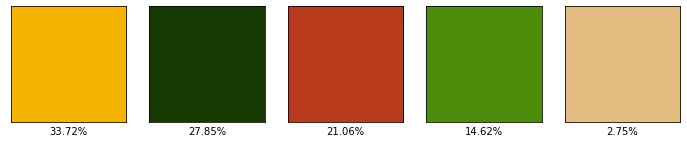

In [29]:
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(n_clusters):
    plt.subplot(1,n_clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش درصد به صورت بهتر</div>

([], <a list of 0 Text major ticklabel objects>)

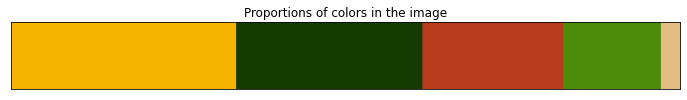

In [30]:
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*500)
    if i==n_clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

plt.imshow(bar)
plt.xticks([])
plt.yticks([])

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نملیش روی تصویر نهایی</div>

In [31]:
rows = 1000
cols = int((img.shape[0]/img.shape[1])*rows)
img = cv2.resize(img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)

copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+
                                             250,cols//2+110),(255,255,255),-1)

final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)


start = rows//2-220
for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20

plt.show()

cv2.imshow('img',final)
cv2.waitKey(0)
cv2.destroyAllWindows()

Thanks to: https://towardsdev.com/how-to-find-the-most-dominant-colors-in-an-image-in-python-using-kmeans-clustering-with-source-527ef3e6775f